<a href="https://colab.research.google.com/github/hassanishere/Data-Analytics/blob/main/Master_Thesis_Working_RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch torchvision


StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 0, 27, Submitted, Running)

     |████████████████████████████████| 755.5 MB 6.2 kB/s s eta 0:00:01
     |████████████████████████████████| 6.9 MB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 410.6 MB 6.6 kB/s s eta 0:00:01
     |████████████████████████████████| 14.1 MB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 99 kB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 121.6 MB 107.6 MB/s eta 0:00:01
     |████████████████████████████████| 167.9 MB 29 kB/s /s eta 0:00:01
     |████████████████████████████████| 823 kB 75.2 MB/s eta 0:00:01
     |████████████████████████████████| 124.2 MB 105.3 MB/s eta 0:00:01
     |████████████████████████████████| 731.7 MB 14 kB/s s eta 0:00:011
     |████████████████████████████████| 196.0 MB 107.0 MB/s eta 0:00:01

In [ ]:
!pip install torch

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 2, 7, Finished, Available)

In [ ]:
import pandas as pd


# Read JSON file into DataFrame
df = pd.read_json('Users/hassan-kamran/output.json')

# Display DataFrame
print(df)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 9, Finished, Available)

                                              reviewText  overall  \
0      This is one my must have books. It is a master...        5   
1      This book provides a reflection that you can a...        5   
2      I first read THE PROPHET in college back in th...        5   
3      A timeless classic.  It is a very demanding an...        5   
4      Reading this made my mind feel like a still po...        5   
...                                                  ...      ...   
10115  I got a copy of this book to read review throu...        4   
10116  I have to admit, I tore through this book pret...        4   
10117  This was a heartwarming story.  I enjoyed the ...        4   
10118  I was more confused by this fanciful tale than...        3   
10119  This book was a little slow to start, but over...        4   

                                        tokenized_review  \
0      ['This', 'is', 'one', 'my', 'must', 'have', 'b...   
1      ['This', 'book', 'provides', 'a', 'reflectio

In [ ]:
!pip install transformers==3.0.2

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 0, 22, Finished, Available)

     |████████████████████████████████| 769 kB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 75.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 91.3 MB/s eta 0:00:01
     |████████████████████████████████| 897 kB 83.9 MB/s eta 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [ ]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 10, Finished, Available)

In [ ]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 11, Finished, Available)

/home/trusted-service-user/cluster-env/env/lib/python3.8/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
# Create a new DataFrame 'train' with 'reviewText' and 'overall' columns
train = pd.DataFrame({'Phrase': df['reviewText'], 'Sentiment': df['overall']})

# Convert sentiment labels from range 1-5 to range 0-4
train['Sentiment'] = train['Sentiment'] - 1

# Print the first few rows of the new DataFrame 'train'
print(train.head())




StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 12, Finished, Available)

                                              Phrase  Sentiment
0  This is one my must have books. It is a master...          4
1  This book provides a reflection that you can a...          4
2  I first read THE PROPHET in college back in th...          4
3  A timeless classic.  It is a very demanding an...          4
4  Reading this made my mind feel like a still po...          4


In [ ]:
new_df = train[['Phrase', 'Sentiment']]

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 13, Finished, Available)

In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 14, Finished, Available)

In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.Phrase
        self.targets = self.data.Sentiment
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 15, Finished, Available)

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 16, Finished, Available)

FULL Dataset: (10120, 2)
TRAIN Dataset: (8096, 2)
TEST Dataset: (2024, 2)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 17, Finished, Available)

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 18, Finished, Available)

In [ ]:
model = RobertaClass()
model.to(device)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 19, Finished, Available)

RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-0

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 20, Finished, Available)

In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 21, Finished, Available)

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)


        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)

        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 22, Finished, Available)

In [ ]:
EPOCHS = 1
for epoch in range(EPOCHS):
    train(epoch)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 23, Submitted, Running)

1012it [1:35:05,  5.64s/it]


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)

            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")

    return epoch_accu


StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 24, Finished, Available)

In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 25, Finished, Available)

506it [07:23,  1.14it/s]


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

In [ ]:
output_model_file = 'pytorch_roberta_sentiment.bin'
output_vocab_file = './'

model_to_save = model
torch.save(model_to_save, output_model_file)
tokenizer.save_vocabulary(output_vocab_file)

print('All files saved')
print('This tutorial is completed')

StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 26, Finished, Available)

All files saved
This tutorial is completed


StatementMeta(60d01bdd-2ed9-4cbe-b804-1b1e209185f8, 3, 31, Finished, Available)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

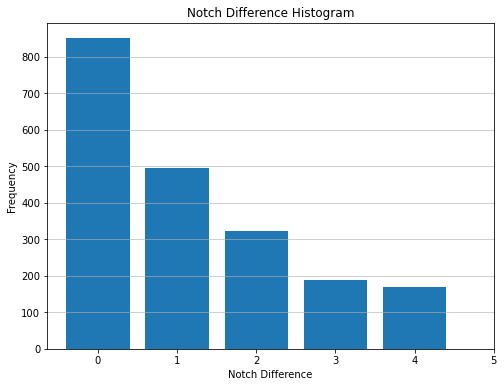

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Apply the model to the testing dataset and collect predictions
predicted_sentiments = []
with torch.no_grad():
    model.eval()
    for batch in testing_loader:
        input_ids = batch['ids'].to(device)
        mask = batch['mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)

        outputs = model(input_ids, mask, token_type_ids)
        predictions = torch.argmax(outputs, dim=1)
        predicted_sentiments.extend(predictions.cpu().numpy())

# Extract actual sentiments from the testing dataset
actual_sentiments = testing_set.data['Sentiment'].values  # Update this line

# Calculate notch differences
notch_diff = np.abs(actual_sentiments - predicted_sentiments)

# Plot the notch difference graph
plt.figure(figsize=(8, 6))
plt.hist(notch_diff, bins=range(6), align='left', rwidth=0.8)
plt.xlabel('Notch Difference')
plt.ylabel('Frequency')
plt.title('Notch Difference Histogram')
plt.xticks(range(6))
plt.grid(axis='y', alpha=0.75)
plt.show()
